<a href="https://colab.research.google.com/github/TopData530/Sales-Prediction/blob/main/Cumulative_Interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cumulative Interest Paid
##Eric Saechao

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/mortgages (5).csv')
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [8]:
df['Starting Balance'] = df['Starting Balance'].astype(int)

In [12]:
mFilter = df['Mortgage Name'] == '30 Year'
iFilter = df['Interest Rate'] == 0.03

In [16]:
m30_05 = df.loc[mFilter & ~iFilter,: ]
m30_03 = df.loc[mFilter & iFilter,: ]

In [19]:
m30_05['Interest Paid'].cumsum()
m30_03['Interest Paid'].cumsum()

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

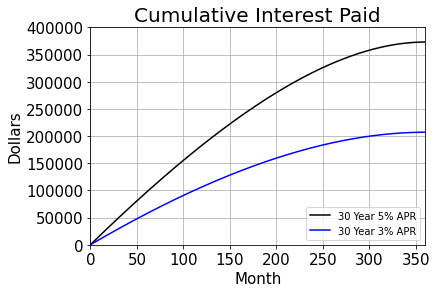

In [57]:
fg, axes = plt.subplots(nrows=1, ncols=1)
plt.plot(m30_05['Month'], m30_05['Interest Paid'].cumsum(), c = 'k');
plt.plot(m30_03['Month'], m30_03['Interest Paid'].cumsum(), c = 'b');
plt.grid()
plt.xlabel('Month', fontsize=15)
plt.ylabel('Dollars', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Cumulative Interest Paid', fontsize=20)
axes.set_ylim(bottom=0, top=400000)
axes.set_xlim(left=0, right=360)
plt.legend(['30 Year 5% APR', '30 Year 3% APR'],loc= 'lower right')
plt.show()